In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/cleaned_candidates.csv')
df

,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,AL,1,Jerry Carl,R,False,True,64.9,1971321.0,1859349.0
1,AL,1,James Averhart,D,False,False,35.0,80095.0,78973.0
2,AL,2,Barry Moore,R,False,True,65.3,650807.0,669368.0
3,AL,2,Phyllis Harvey-Hall,D,False,False,34.6,56050.0,55988.0
4,AL,3,Mike D Rogers,R,True,True,67.5,1193111.0,1218564.0
...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,False,False,39.2,1261957.0,1232690.0
804,WI,8,Mike Gallagher,R,True,True,64.0,3202905.0,2841801.0
805,WI,8,Amanda Stuck,D,False,False,36.0,416978.0,399916.0
806,WY,1,Liz Cheney,R,True,True,68.6,3003883.0,3060167.0


In [3]:
# Convert boolean values to integers
df['Winner'] = df['Winner'].astype(int)
df

,State,District,Name,Party,Incumbent,Winner,Vote Percentage,Raised,Spent
0,AL,1,Jerry Carl,R,False,1,64.9,1971321.0,1859349.0
1,AL,1,James Averhart,D,False,0,35.0,80095.0,78973.0
2,AL,2,Barry Moore,R,False,1,65.3,650807.0,669368.0
3,AL,2,Phyllis Harvey-Hall,D,False,0,34.6,56050.0,55988.0
4,AL,3,Mike D Rogers,R,True,1,67.5,1193111.0,1218564.0
...,...,...,...,...,...,...,...,...,...
803,WI,7,Tricia Zunker,D,False,0,39.2,1261957.0,1232690.0
804,WI,8,Mike Gallagher,R,True,1,64.0,3202905.0,2841801.0
805,WI,8,Amanda Stuck,D,False,0,36.0,416978.0,399916.0
806,WY,1,Liz Cheney,R,True,1,68.6,3003883.0,3060167.0


In [4]:
# Assuming your dataframe is named df and the column with the money spent is named 'Spent'
df['Total_Spent_Per_District'] = df.groupby(['State', 'District'])['Spent'].transform('sum')

df['Percent_Spent'] = (df['Spent'] / df['Total_Spent_Per_District']) * 100


In [5]:
print(df.columns)
cand_spent_logreg = smf.logit("Winner ~ Percent_Spent",
                          data = df).fit()

Index(['State', 'District', 'Name', 'Party', 'Incumbent', 'Winner',
       'Vote Percentage', 'Raised', 'Spent', 'Total_Spent_Per_District',
       'Percent_Spent'],
      dtype='object')
Optimization terminated successfully.
         Current function value: 0.262532
         Iterations 7


In [6]:
cand_spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  808
Model:                          Logit   Df Residuals:                      806
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Oct 2023   Pseudo R-squ.:                  0.6203
Time:                        19:31:09   Log-Likelihood:                -212.13
converged:                       True   LL-Null:                       -558.64
Covariance Type:            nonrobust   LLR p-value:                9.852e-153
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.4026      0.322    -13.679      0.000      -5.033      -3.772
Percent_Spent     0.0877      0.006     15.005      0.000       0.076       0.099
=================================================================================
"""

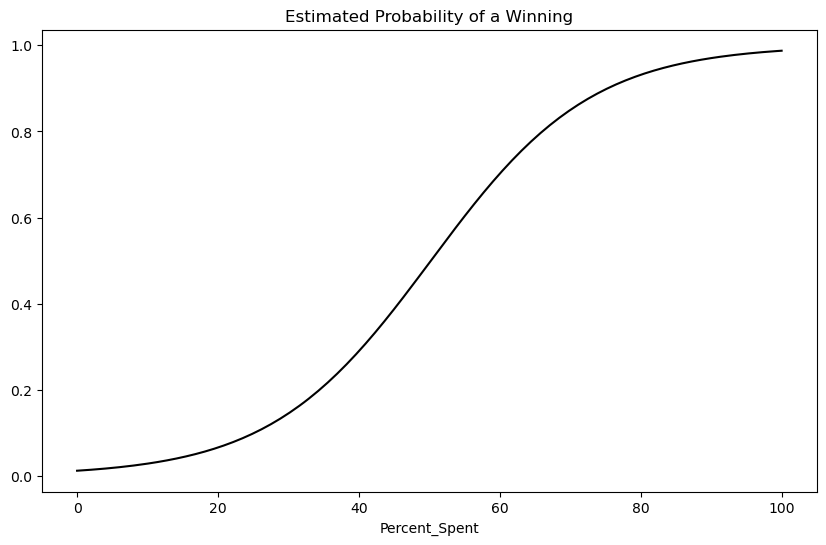

In [8]:
fit_df = pd.DataFrame({
    'Percent_Spent': np.linspace(start = df['Percent_Spent'].min(),
                            stop = df['Percent_Spent'].max(),
                            num = 150)
})

fit_df['fit'] = cand_spent_logreg.predict(fit_df)

ax = fit_df.plot(x = 'Percent_Spent',
             y = 'fit',
             legend = False,
             figsize = (10,6),
             color = 'black',
            title = 'Estimated Probability of a Winning');

